# CAR PREDICTOR PRO+


# PROJECT IS GOING TO PRESENT BY
  .Vivek.Suryawanshi Pursuing in data software engineering

# INTRODUCTION
Car predictor pro is advanced machine learning techniques to predict the price of the car using some features of the car.

In [169]:
# importing necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# loading data set
we are loading the set as df

# Basic Understanding of data
symboling: Represents the insurance risk rating associated with the car. It is often used as a measure of how risky a car is to insure.

normalized-losses: Refers to the normalized average loss payment per insured vehicle year. It provides information about the relative average loss payment per insured vehicle year.

make: Indicates the manufacturer or brand of the car.

fuel-type: Specifies the type of fuel the car uses (e.g., gasoline, diesel).

body-style: Describes the body style or configuration of the car (e.g., sedan, coupe, hatchback).

drive-wheels: Indicates the type of drive wheels the car has (e.g., front-wheel drive, rear-wheel drive, all-wheel drive).

engine-location: Specifies the location of the engine in the car (e.g., front, rear).

width: Represents the width of the car in inches.

height: Represents the height of the car in inches.

engine-type: Describes the type or configuration of the car's engine (e.g., inline, V-shape).

engine-size: Indicates the size or displacement of the car's engine in cubic centimeters (cc) or liters.

horsepower: Represents the power output of the car's engine, typically measured in horsepower (hp) or kilowatts (kW).

city-mpg: Refers to the miles per gallon (mpg) rating of the car for city driving conditions.

highway-mpg: Refers to the miles per gallon (mpg) rating of the car for highway driving conditions.

price: Represents the price of the car.

In [170]:
#reading dataset
df=pd.read_csv('Finance_Loan_approval_Prediction.csv')

In [171]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploring the data set
Df.columns
Df.shape'
Df.dtypes
df.info()

# Data Cleaning


 . Handling missing value

In [172]:
df.isna().sum()
#missing values can be ?,nan,missing,' '
#isna can deletct only nan 

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [174]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.757329,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.011227,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


# insights:
    THE Q1 of price is 2877.500000 and Q3 is 5795.000000 so Q3 is more 
    THE min value of price is 150.000000 and max value of price is 81000.000000
    so by this description i observed that when the engine size increases the price is also increases.

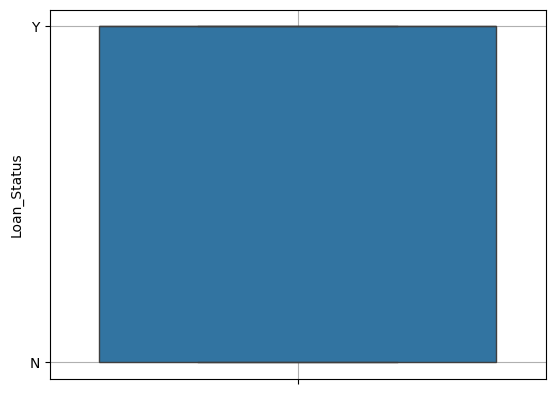

In [175]:
sns.boxplot(df["Loan_Status"])
plt.grid()

So by this graph we can conclude that the price above 30.000 are all outliers

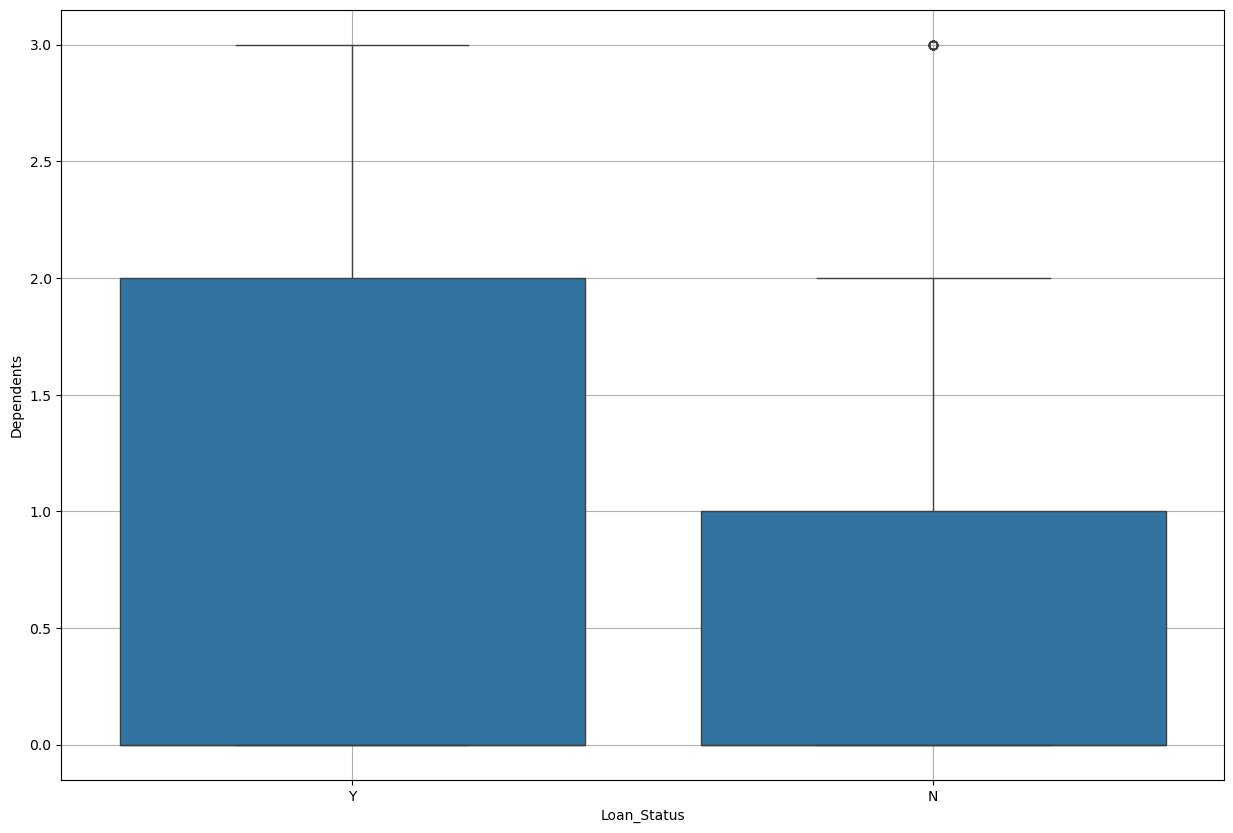

In [176]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df["Loan_Status"],y=df["Dependents"])
plt.grid()

# insights
Toyata has 5 outliers
plymouth 1 outlier
mistubishi 2 outliers
isuzu,honda,dodge company has 1 outlier of each

# Handling outliers

#  for this sample data so we are getting a positive skewed data that means right skewed

In [177]:
df.shape

(614, 13)

In [178]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [179]:
Num_columns = df.select_dtypes(["int64","float64","float32"])
cat_columns = df.select_dtypes(object)

In [180]:
Num_columns 

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,5849,0.0,NaN,360.0,1.0
1,1,4583,1508.0,128.0,360.0,1.0
2,0,3000,0.0,66.0,360.0,1.0
3,0,2583,2358.0,120.0,360.0,1.0
4,0,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0
610,3,4106,0.0,40.0,180.0,1.0
611,1,8072,240.0,253.0,360.0,1.0
612,2,7583,0.0,187.0,360.0,1.0


In [181]:
cat_columns 

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,LP002978,Female,No,Graduate,No,Rural,Y
610,LP002979,Male,Yes,Graduate,No,Rural,Y
611,LP002983,Male,Yes,Graduate,No,Urban,Y
612,LP002984,Male,Yes,Graduate,No,Urban,Y


In [182]:
Num_columns.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

Dependents


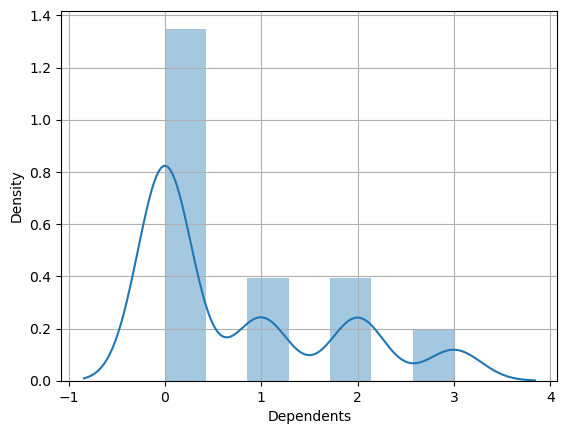

ApplicantIncome


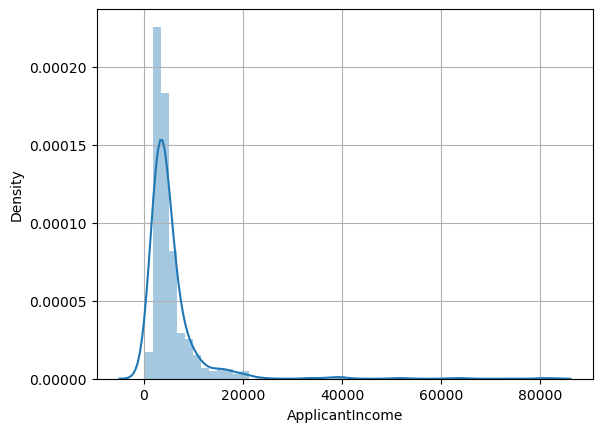

CoapplicantIncome


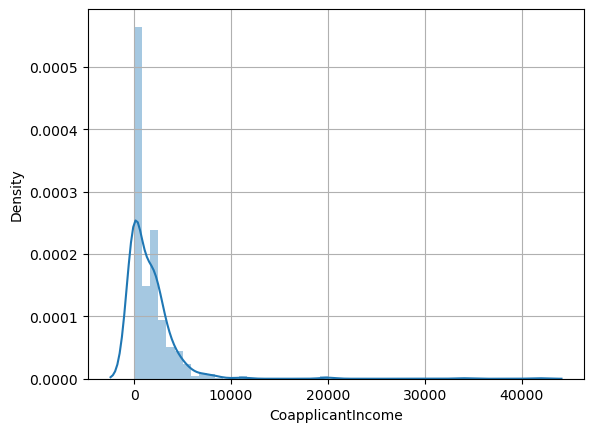

LoanAmount


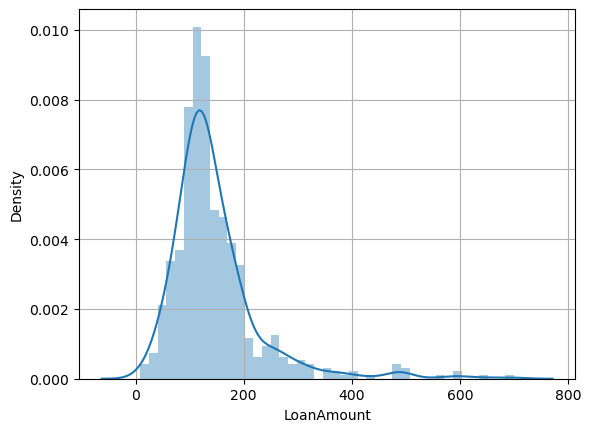

Loan_Amount_Term


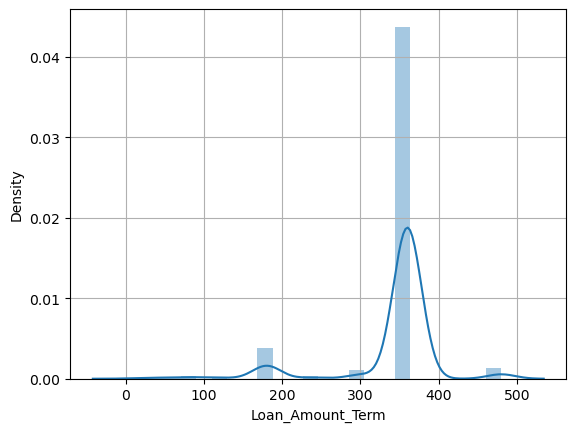

Credit_History


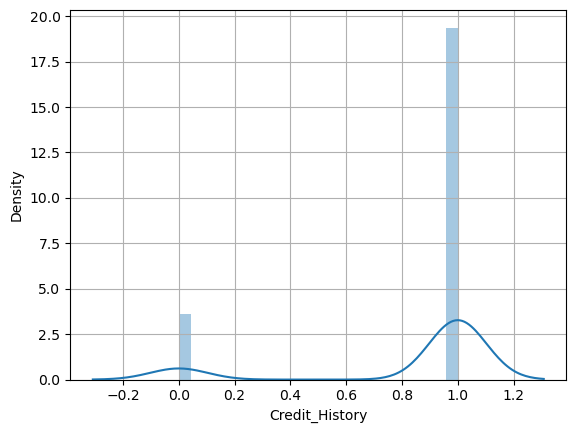

In [183]:
for col in Num_columns.columns.to_list():
    print(col)
    sns.distplot(df[col])
    plt.grid()
    plt.show()
    print("========================================================")

so here we have to check the skewness of all the columns density
.symboling is normal distribution
.normalised is having rightskewed data means positively skewed
.width is having both side skew ness
. height is directly propotional
. engine _size is  having rightskewed data means positively skewed
. horse power is also having rightskewed data means positively skewed
.city map is having a little bit right skewed
. highway_mpg is normal distribution.
. price is also having rightskewed data means positively skewed

# Encoding

In [184]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder

In [185]:
onthot_df = df.loc[:,["Loan_ID","Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]]

In [186]:
ohe = OneHotEncoder(drop='first')

In [187]:
col_list=onthot_df.columns

In [188]:
col_list

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [189]:
df1=ohe.fit_transform(onthot_df[col_list]).toarray()

In [190]:
df1

array([[0., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [191]:
df1.shape

(614, 620)

In [192]:
df2 = np.resize(df1, (614 , 7))

In [193]:
df2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [194]:
df2.shape

(614, 7)

In [195]:
pd.DataFrame(df2,columns=["Loan_ID","Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"])

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,0.0,0.0,0.0,0.0,0.0,0.0,0.0
611,0.0,0.0,0.0,0.0,0.0,0.0,0.0
612,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
enc = OrdinalEncoder()

In [197]:
df[["Loan_ID","Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]]=enc.fit_transform(df[["Loan_ID","Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]])

In [198]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0,0.0,0.0,5849,0.0,NaN,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


In [199]:
df.skew()

Loan_ID              0.000000
Gender              -1.620738
Married             -0.637293
Dependents           0.984661
Education            1.367622
Self_Employed        2.059922
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [200]:
df.skew().sort_values()

Loan_Amount_Term    -2.362414
Credit_History      -1.882361
Gender              -1.620738
Loan_Status         -0.809998
Married             -0.637293
Property_Area       -0.066196
Loan_ID              0.000000
Dependents           0.984661
Education            1.367622
Self_Employed        2.059922
LoanAmount           2.677552
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
dtype: float64

# lets split the data

In [201]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [202]:
from sklearn.model_selection import train_test_split

In [203]:
xtrain, xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [204]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape,sep="\n")

(491, 12)
(123, 12)
(491,)
(123,)


In [205]:
xtrain

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
222,222.0,1.0,0.0,0,0.0,0.0,2971,2791.0,144.0,360.0,1.0,1.0
281,281.0,1.0,1.0,0,0.0,0.0,3927,800.0,112.0,360.0,1.0,1.0
372,372.0,1.0,1.0,2,0.0,1.0,9323,7873.0,380.0,300.0,1.0,0.0
32,32.0,1.0,0.0,1,0.0,1.0,4692,0.0,106.0,360.0,1.0,0.0
204,204.0,1.0,1.0,2,1.0,0.0,3917,0.0,124.0,360.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
534,534.0,0.0,0.0,0,1.0,1.0,18165,0.0,125.0,360.0,1.0,2.0
584,584.0,1.0,1.0,1,0.0,0.0,2787,1917.0,146.0,360.0,0.0,0.0
493,493.0,0.0,0.0,0,1.0,1.0,17263,0.0,225.0,360.0,1.0,1.0
527,527.0,1.0,1.0,1,1.0,0.0,5285,1430.0,161.0,360.0,0.0,1.0


In [206]:
xtest

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
414,414.0,0.0,1.0,0,1.0,0.0,2149,3237.0,178.0,360.0,0.0,1.0
569,569.0,1.0,1.0,0,0.0,0.0,3166,2064.0,104.0,360.0,0.0,2.0
265,265.0,1.0,0.0,0,0.0,0.0,4095,3447.0,151.0,360.0,1.0,0.0
84,84.0,1.0,1.0,1,0.0,0.0,3988,0.0,50.0,240.0,1.0,2.0
109,109.0,1.0,1.0,3,1.0,0.0,2071,754.0,94.0,480.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
152,152.0,1.0,0.0,0,0.0,0.0,9166,0.0,244.0,360.0,1.0,2.0
589,589.0,1.0,1.0,2,0.0,1.0,2726,0.0,106.0,360.0,0.0,1.0
123,123.0,1.0,1.0,2,0.0,0.0,2957,0.0,81.0,360.0,1.0,1.0
3,3.0,1.0,1.0,0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0


In [207]:
ytrain

222    1.0
281    1.0
372    1.0
32     0.0
204    1.0
      ... 
534    1.0
584    0.0
493    1.0
527    1.0
168    0.0
Name: Loan_Status, Length: 491, dtype: float64

In [208]:
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import classification_report,accuracy_score

In [209]:
#lng=LinearRegression()

In [210]:
#lng.fit(xtrain,ytrain)
#yp=lng.predict(xtest)
#train=lng.score(xtrain,ytrain)
#test=lng.score(xtest,ytest)
#print(f"Training score is : {train}\nTesting score is : {test}\n\n")
#print(classification_report(ytest,yp))

In [211]:
from sklearn.tree import DecisionTreeRegressor

In [212]:
dt=DecisionTreeRegressor()

In [213]:
dt=DecisionTreeRegressor()
dt.fit(xtrain,ytrain)
yp=dt.predict(xtest)

train=dt.score(xtrain,ytrain)
test=dt.score(xtest,ytest)
print(f"Training score is : {train}\nTesting score is : {test}\n\n")

Training score is : 1.0
Testing score is : -0.4642857142857142




In [214]:
from sklearn.ensemble import RandomForestRegressor

In [215]:
rd=RandomForestRegressor()
rd.fit(xtrain,ytrain)
yp=rd.predict(xtest)

train=rd.score(xtrain,ytrain)
test=rd.score(xtest,ytest)
print(f"Training score is : {train}\nTesting score is : {test}\n\n")

Training score is : 0.8972587674517539
Testing score is : 0.2267820512820513




So the graph states that:
    X-axis is algorithms what we have used and y axis is training and testing
    
# insights:
    linear regression algorithm states 87 for training and 69 for testing
    decision Tree 99 for training and 56 for testing
    Randomforest  99 for taining and 68 for testing

In [216]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [217]:
sc=StandardScaler()

In [218]:
np.array(df).shape

(614, 13)

In [219]:
n1=np.array(df)

In [220]:
n1.resize(194,1)

In [221]:
n1

array([[  0.],
       [  1.],
       [  2.],
       [  3.],
       [  4.],
       [  5.],
       [  6.],
       [  7.],
       [  8.],
       [  9.],
       [ 10.],
       [ 11.],
       [ 12.],
       [ 13.],
       [ 14.],
       [ 15.],
       [ 16.],
       [ 17.],
       [ 18.],
       [ 19.],
       [ 20.],
       [ 21.],
       [ 22.],
       [ 23.],
       [ 24.],
       [ 25.],
       [ 26.],
       [ 27.],
       [ 28.],
       [ 29.],
       [ 30.],
       [ 31.],
       [ 32.],
       [ 33.],
       [ 34.],
       [ 35.],
       [ 36.],
       [ 37.],
       [ 38.],
       [ 39.],
       [ 40.],
       [ 41.],
       [ 42.],
       [ 43.],
       [ 44.],
       [ 45.],
       [ 46.],
       [ 47.],
       [ 48.],
       [ 49.],
       [ 50.],
       [ 51.],
       [ 52.],
       [ 53.],
       [ 54.],
       [ 55.],
       [ 56.],
       [ 57.],
       [ 58.],
       [ 59.],
       [ 60.],
       [ 61.],
       [ 62.],
       [ 63.],
       [ 64.],
       [ 65.],
       [ 6

In [222]:
n1.shape

(194, 1)

In [223]:
res=sc.fit_transform(n1)

In [224]:
res

array([[-1.7231456 ],
       [-1.70528917],
       [-1.68743274],
       [-1.66957631],
       [-1.65171988],
       [-1.63386345],
       [-1.61600702],
       [-1.59815059],
       [-1.58029415],
       [-1.56243772],
       [-1.54458129],
       [-1.52672486],
       [-1.50886843],
       [-1.491012  ],
       [-1.47315557],
       [-1.45529914],
       [-1.43744271],
       [-1.41958627],
       [-1.40172984],
       [-1.38387341],
       [-1.36601698],
       [-1.34816055],
       [-1.33030412],
       [-1.31244769],
       [-1.29459126],
       [-1.27673483],
       [-1.25887839],
       [-1.24102196],
       [-1.22316553],
       [-1.2053091 ],
       [-1.18745267],
       [-1.16959624],
       [-1.15173981],
       [-1.13388338],
       [-1.11602694],
       [-1.09817051],
       [-1.08031408],
       [-1.06245765],
       [-1.04460122],
       [-1.02674479],
       [-1.00888836],
       [-0.99103193],
       [-0.9731755 ],
       [-0.95531906],
       [-0.93746263],
       [-0

In [225]:
mm=MinMaxScaler()

In [226]:
n1

array([[  0.],
       [  1.],
       [  2.],
       [  3.],
       [  4.],
       [  5.],
       [  6.],
       [  7.],
       [  8.],
       [  9.],
       [ 10.],
       [ 11.],
       [ 12.],
       [ 13.],
       [ 14.],
       [ 15.],
       [ 16.],
       [ 17.],
       [ 18.],
       [ 19.],
       [ 20.],
       [ 21.],
       [ 22.],
       [ 23.],
       [ 24.],
       [ 25.],
       [ 26.],
       [ 27.],
       [ 28.],
       [ 29.],
       [ 30.],
       [ 31.],
       [ 32.],
       [ 33.],
       [ 34.],
       [ 35.],
       [ 36.],
       [ 37.],
       [ 38.],
       [ 39.],
       [ 40.],
       [ 41.],
       [ 42.],
       [ 43.],
       [ 44.],
       [ 45.],
       [ 46.],
       [ 47.],
       [ 48.],
       [ 49.],
       [ 50.],
       [ 51.],
       [ 52.],
       [ 53.],
       [ 54.],
       [ 55.],
       [ 56.],
       [ 57.],
       [ 58.],
       [ 59.],
       [ 60.],
       [ 61.],
       [ 62.],
       [ 63.],
       [ 64.],
       [ 65.],
       [ 6

In [227]:
n2=mm.fit_transform(n1)

In [228]:
n2

array([[0.        ],
       [0.00518135],
       [0.01036269],
       [0.01554404],
       [0.02072539],
       [0.02590674],
       [0.03108808],
       [0.03626943],
       [0.04145078],
       [0.04663212],
       [0.05181347],
       [0.05699482],
       [0.06217617],
       [0.06735751],
       [0.07253886],
       [0.07772021],
       [0.08290155],
       [0.0880829 ],
       [0.09326425],
       [0.0984456 ],
       [0.10362694],
       [0.10880829],
       [0.11398964],
       [0.11917098],
       [0.12435233],
       [0.12953368],
       [0.13471503],
       [0.13989637],
       [0.14507772],
       [0.15025907],
       [0.15544041],
       [0.16062176],
       [0.16580311],
       [0.17098446],
       [0.1761658 ],
       [0.18134715],
       [0.1865285 ],
       [0.19170984],
       [0.19689119],
       [0.20207254],
       [0.20725389],
       [0.21243523],
       [0.21761658],
       [0.22279793],
       [0.22797927],
       [0.23316062],
       [0.23834197],
       [0.243

In [229]:
res

array([[-1.7231456 ],
       [-1.70528917],
       [-1.68743274],
       [-1.66957631],
       [-1.65171988],
       [-1.63386345],
       [-1.61600702],
       [-1.59815059],
       [-1.58029415],
       [-1.56243772],
       [-1.54458129],
       [-1.52672486],
       [-1.50886843],
       [-1.491012  ],
       [-1.47315557],
       [-1.45529914],
       [-1.43744271],
       [-1.41958627],
       [-1.40172984],
       [-1.38387341],
       [-1.36601698],
       [-1.34816055],
       [-1.33030412],
       [-1.31244769],
       [-1.29459126],
       [-1.27673483],
       [-1.25887839],
       [-1.24102196],
       [-1.22316553],
       [-1.2053091 ],
       [-1.18745267],
       [-1.16959624],
       [-1.15173981],
       [-1.13388338],
       [-1.11602694],
       [-1.09817051],
       [-1.08031408],
       [-1.06245765],
       [-1.04460122],
       [-1.02674479],
       [-1.00888836],
       [-0.99103193],
       [-0.9731755 ],
       [-0.95531906],
       [-0.93746263],
       [-0

In [230]:
n2

array([[0.        ],
       [0.00518135],
       [0.01036269],
       [0.01554404],
       [0.02072539],
       [0.02590674],
       [0.03108808],
       [0.03626943],
       [0.04145078],
       [0.04663212],
       [0.05181347],
       [0.05699482],
       [0.06217617],
       [0.06735751],
       [0.07253886],
       [0.07772021],
       [0.08290155],
       [0.0880829 ],
       [0.09326425],
       [0.0984456 ],
       [0.10362694],
       [0.10880829],
       [0.11398964],
       [0.11917098],
       [0.12435233],
       [0.12953368],
       [0.13471503],
       [0.13989637],
       [0.14507772],
       [0.15025907],
       [0.15544041],
       [0.16062176],
       [0.16580311],
       [0.17098446],
       [0.1761658 ],
       [0.18134715],
       [0.1865285 ],
       [0.19170984],
       [0.19689119],
       [0.20207254],
       [0.20725389],
       [0.21243523],
       [0.21761658],
       [0.22279793],
       [0.22797927],
       [0.23316062],
       [0.23834197],
       [0.243

In [231]:
target=df["price"]

KeyError: 'price'

In [232]:
target

NameError: name 'target' is not defined

In [233]:
features=df.drop(["price"],axis=1)

KeyError: "['price'] not found in axis"

In [ ]:
features

# Feature Engineering 

In [118]:
features["Area"]=features["width"]*features["height"]

In [119]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,Area
0,3,115.0,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27,3128.08
1,3,115.0,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27,3128.08
2,1,115.0,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26,3432.20
3,2,164.0,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30,3594.66
4,2,164.0,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22,3605.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21.0,1.0,3.0,2.0,0.0,68.9,55.5,3.0,141,114.0,23,28,3823.95
201,-1,95.0,21.0,1.0,3.0,2.0,0.0,68.8,55.5,3.0,141,160.0,19,25,3818.40
202,-1,95.0,21.0,1.0,3.0,2.0,0.0,68.9,55.5,5.0,173,134.0,18,23,3823.95
203,-1,95.0,21.0,0.0,3.0,2.0,0.0,68.9,55.5,3.0,145,106.0,26,27,3823.95


In [120]:
features.drop(["width","height"],axis=1,inplace=True)

In [121]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,engine-size,horsepower,city-mpg,highway-mpg,Area
0,3,115.0,0.0,1.0,0.0,2.0,0.0,0.0,130,111.0,21,27,3128.08
1,3,115.0,0.0,1.0,0.0,2.0,0.0,0.0,130,111.0,21,27,3128.08
2,1,115.0,0.0,1.0,2.0,2.0,0.0,5.0,152,154.0,19,26,3432.20
3,2,164.0,1.0,1.0,3.0,1.0,0.0,3.0,109,102.0,24,30,3594.66
4,2,164.0,1.0,1.0,3.0,0.0,0.0,3.0,136,115.0,18,22,3605.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21.0,1.0,3.0,2.0,0.0,3.0,141,114.0,23,28,3823.95
201,-1,95.0,21.0,1.0,3.0,2.0,0.0,3.0,141,160.0,19,25,3818.40
202,-1,95.0,21.0,1.0,3.0,2.0,0.0,5.0,173,134.0,18,23,3823.95
203,-1,95.0,21.0,0.0,3.0,2.0,0.0,3.0,145,106.0,26,27,3823.95


In [122]:
sc_feature=sc.fit_transform(features)

In [123]:
sc_feature

array([[ 1.84617334, -0.16242308, -1.93400671, ..., -0.67576177,
        -0.58047414, -1.85157709],
       [ 1.84617334, -0.16242308, -1.93400671, ..., -0.67576177,
        -0.58047414, -1.85157709],
       [ 0.17644081, -0.16242308, -1.93400671, ..., -0.982065  ,
        -0.72615588, -0.51074029],
       ...,
       [-1.49329173, -0.7989903 ,  1.413123  , ..., -1.13521662,
        -1.16320109,  1.21644904],
       [-1.49329173, -0.7989903 ,  1.413123  , ...,  0.08999631,
        -0.58047414,  1.21644904],
       [-1.49329173, -0.7989903 ,  1.413123  , ..., -0.982065  ,
        -0.87183761,  1.21644904]])

# model Creation

In [125]:
sc_feature

array([[ 1.84617334, -0.16242308, -1.93400671, ..., -0.67576177,
        -0.58047414, -1.85157709],
       [ 1.84617334, -0.16242308, -1.93400671, ..., -0.67576177,
        -0.58047414, -1.85157709],
       [ 0.17644081, -0.16242308, -1.93400671, ..., -0.982065  ,
        -0.72615588, -0.51074029],
       ...,
       [-1.49329173, -0.7989903 ,  1.413123  , ..., -1.13521662,
        -1.16320109,  1.21644904],
       [-1.49329173, -0.7989903 ,  1.413123  , ...,  0.08999631,
        -0.58047414,  1.21644904],
       [-1.49329173, -0.7989903 ,  1.413123  , ..., -0.982065  ,
        -0.87183761,  1.21644904]])

In [126]:
target

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 194, dtype: int64

In [127]:
x=df["engine-size"]

In [128]:
x

0      130
1      130
2      152
3      109
4      136
      ... 
200    141
201    141
202    173
203    145
204    141
Name: engine-size, Length: 194, dtype: int64

In [129]:
y=target

In [130]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 194, dtype: int64

In [131]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.2,random_state=1)
print(ytrain)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

117    18150
119     7957
174    10698
72     35056
158     7898
       ...  
139     7053
143     9960
75     16503
146     7463
38      9095
Name: price, Length: 155, dtype: int64
(155,)
(39,)
(155,)
(39,)


In [132]:
NX_train=np.array(xtrain)

In [133]:
NX_train.shape

(155,)

In [134]:
NX_train

array([134,  98, 110, 234, 110,  92,  97,  98, 130, 152, 152,  90, 209,
       136,  98, 109,  91, 110,  90, 183, 181, 141,  61,  98,  90,  70,
        97, 120,  92, 146, 141, 164, 120,  97, 110, 122, 120, 151, 164,
       141,  97, 258,  97, 110, 109,  97,  92, 120,  97, 173, 146, 122,
        92,  90,  97,  92, 152, 308, 103,  92, 136, 152, 130,  98, 110,
       183,  80, 122,  97,  97, 326, 140,  92,  97,  98, 108,  97, 122,
       145, 121, 108,  92,  92,  98, 110, 110,  98, 141,  98, 181, 132,
        98, 121, 131, 146, 120, 109, 108, 152, 141, 183, 209, 111,  98,
       152, 122,  70,  90,  98, 119,  90, 109, 146,  91,  92, 121, 141,
        92, 194,  90, 122, 131, 122, 121, 130, 122,  90, 122, 134, 136,
       141, 108,  97, 181, 234,  91, 108,  98,  98, 108,  92, 181,  90,
       109,  90, 108, 304, 121,  92, 156, 108, 108, 140, 108, 110],
      dtype=int64)

In [135]:
NX_train.resize(155,1)

In [136]:
NX_train.shape

(155, 1)

In [137]:
NX_train

array([[134],
       [ 98],
       [110],
       [234],
       [110],
       [ 92],
       [ 97],
       [ 98],
       [130],
       [152],
       [152],
       [ 90],
       [209],
       [136],
       [ 98],
       [109],
       [ 91],
       [110],
       [ 90],
       [183],
       [181],
       [141],
       [ 61],
       [ 98],
       [ 90],
       [ 70],
       [ 97],
       [120],
       [ 92],
       [146],
       [141],
       [164],
       [120],
       [ 97],
       [110],
       [122],
       [120],
       [151],
       [164],
       [141],
       [ 97],
       [258],
       [ 97],
       [110],
       [109],
       [ 97],
       [ 92],
       [120],
       [ 97],
       [173],
       [146],
       [122],
       [ 92],
       [ 90],
       [ 97],
       [ 92],
       [152],
       [308],
       [103],
       [ 92],
       [136],
       [152],
       [130],
       [ 98],
       [110],
       [183],
       [ 80],
       [122],
       [ 97],
       [ 97],
       [326],
      

In [138]:
NX_test=np.array(xtest)

In [139]:
NX_test.shape

(39,)

In [140]:
NX_test.resize(39,1)

In [141]:
NX_test.shape

(39, 1)

In [142]:
NX_test

array([[258],
       [109],
       [146],
       [ 92],
       [108],
       [108],
       [203],
       [110],
       [109],
       [120],
       [109],
       [136],
       [ 92],
       [209],
       [108],
       [122],
       [122],
       [ 91],
       [ 79],
       [194],
       [ 91],
       [136],
       [181],
       [122],
       [122],
       [122],
       [ 97],
       [132],
       [ 70],
       [121],
       [183],
       [194],
       [122],
       [181],
       [130],
       [164],
       [110],
       [ 90],
       [120]], dtype=int64)

In [143]:
S_lr=LinearRegression()
S_Model=S_lr.fit(NX_train,ytrain)

In [144]:
S_Model.coef_

array([164.86716373])

In [145]:
S_Model.intercept_

-7589.223911452258

In [146]:
yp=S_Model.predict(NX_test)

In [147]:
yp

array([34946.50433087, 10381.29693511, 16481.38199312,  7578.5551517 ,
       10216.42977138, 10216.42977138, 25878.81032573, 10546.16409884,
       10381.29693511, 12194.83573614, 10381.29693511, 14832.71035582,
        7578.5551517 , 26868.01330811, 10216.42977138, 12524.5700636 ,
       12524.5700636 ,  7413.68798797,  5435.28202321, 24395.00585216,
        7413.68798797, 14832.71035582, 22251.73272367, 12524.5700636 ,
       12524.5700636 , 12524.5700636 ,  8402.89097035, 14173.2417009 ,
        3951.47754964, 12359.70289987, 22581.46705113, 24395.00585216,
       12524.5700636 , 22251.73272367, 13843.50737344, 19448.99094026,
       10546.16409884,  7248.82082424, 12194.83573614])

In [148]:
ytest

47     32250
183     7975
169     9989
36      7295
142     7775
11     16925
129    12000
87      9279
186     8495
107    11900
185     8195
191    13295
30      6479
16     41315
149    11694
173     8948
28      8921
54      7395
32      5399
128    37028
50      5195
4      17450
103    13499
59      8845
81      8499
61     10595
138     5118
130     9295
56     11845
133    12170
70     31600
126    32528
62     10245
102    14399
198    18420
14     24565
42     10345
19      6295
115    16630
Name: price, dtype: int64

# Model validation

In [153]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [1]:
MAE=mean_absolute_error(ytest,yp)
MSE=mean_squared_error(ytest,yp)
RMSE=np.sqrt(MSE)
r2=r2_score(ytest,yp)
print(f"Mean absolute error is {MAE}\nMean squared error is {MSE}\nRoot mean square error is {RMSE}\nAccuracy is {r2}")

NameError: name 'mean_absolute_error' is not defined